In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data_folder/flight_fare_dataset.csv')
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [4]:
df.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [5]:
df.duplicated().sum()

6722

In [6]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445366 entries, 0 to 452086
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    445366 non-null  object 
 1   Journey_day        445366 non-null  object 
 2   Airline            445366 non-null  object 
 3   Flight_code        445366 non-null  object 
 4   Class              445366 non-null  object 
 5   Source             445366 non-null  object 
 6   Departure          445366 non-null  object 
 7   Total_stops        445366 non-null  object 
 8   Arrival            445366 non-null  object 
 9   Destination        445366 non-null  object 
 10  Duration_in_hours  445366 non-null  float64
 11  Days_left          445366 non-null  int64  
 12  Fare               445366 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 47.6+ MB


In [8]:
# Some statistical information
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration_in_hours,445366.0,12.182491,7.299361,0.75,6.5,11.25,16.3333,43.5833
Days_left,445366.0,25.617822,14.302610,1.00,13.0,26.00,38.0000,50.0000
Fare,445366.0,22919.747165,20394.214040,1307.00,8712.0,13362.00,36980.0000,143019.0000


We'll get back to the date column, right now it doesn't seem that important.  
Starting with the day column.

In [9]:
df["Journey_day"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

<Axes: xlabel='Journey_day', ylabel='count'>

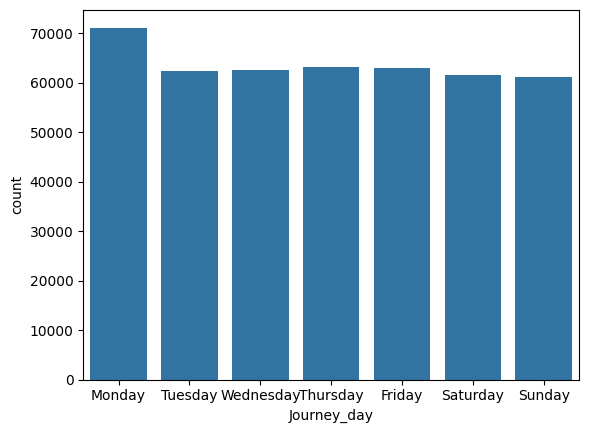

In [10]:
sns.countplot(x="Journey_day", data=df)

Most of the people are travelling on monday. But the count is not that much as compared to other days. On almost all the days of the week, people travel.

In [11]:
# Seeing the value counts
df["Journey_day"].value_counts()

Journey_day
Monday       71194
Thursday     63157
Friday       63035
Wednesday    62698
Tuesday      62379
Saturday     61624
Sunday       61279
Name: count, dtype: int64

In [12]:
df["Airline"].unique()

array(['SpiceJet', 'Indigo', 'GO FIRST', 'Air India', 'AirAsia',
       'Vistara', 'AkasaAir', 'AllianceAir', 'StarAir'], dtype=object)

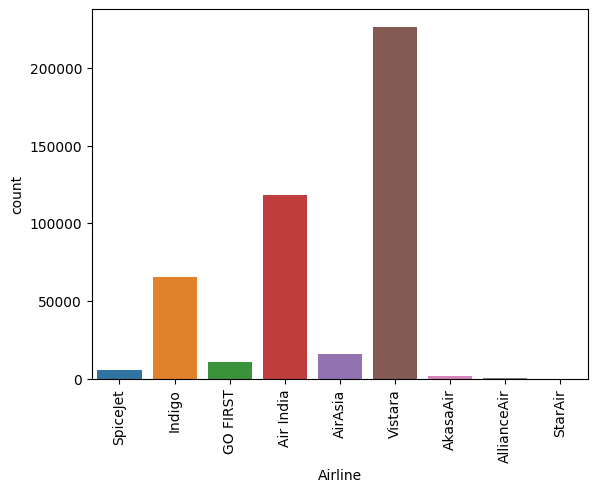

In [13]:
sns.countplot(x="Airline", data=df, hue="Airline")
plt.xticks(rotation=90)
plt.show()

In [14]:
df["Flight_code"].unique()

array(['SG-8169', '6E-2519', 'G8-354', ..., '6E-6493', '6E-7073',
       '6E-348'], dtype=object)

In [15]:
df["Flight_code"].value_counts()
# Flight code are so many categorical values
# We will see how much this code affects the the price of the flight

Flight_code
UK-936     5117
UK-706     4957
UK-918     4912
UK-926     4388
UK-832     4244
           ... 
6E-435        1
6E-251        1
6E-2417       1
6E-6398       1
G8-911        1
Name: count, Length: 1405, dtype: int64

In [16]:
df["Class"].unique()

array(['Economy', 'Premium Economy', 'Business', 'First'], dtype=object)

<Axes: xlabel='Class', ylabel='count'>

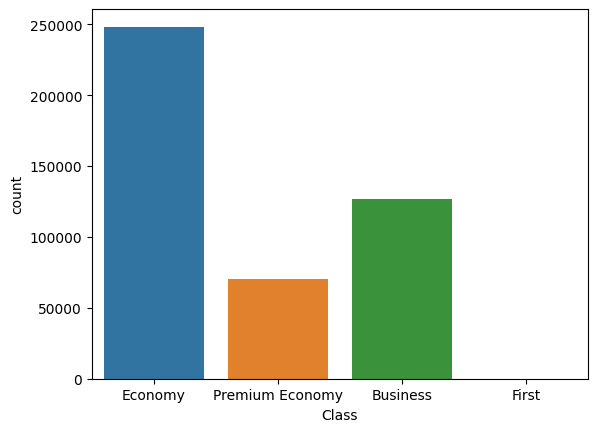

In [17]:
sns.countplot(x="Class", data=df, hue="Class")

<Axes: title={'center': 'Class distribution'}, ylabel='count'>

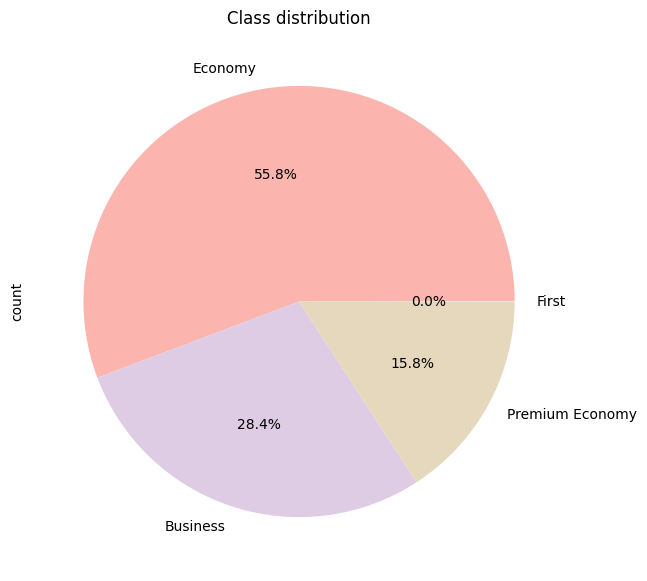

In [18]:
df["Class"].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', cmap='Pastel1', title="Class distribution")

Most of the people are travelling in Economy, and then Business class.  
Premium Economy is less. And first class is very very less.

In [19]:
df["Class"].value_counts()

Class
Economy            248323
Business           126535
Premium Economy     70364
First                 144
Name: count, dtype: int64

Only 144 First class.

In [20]:
df["Source"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai',
       'Ahmedabad'], dtype=object)

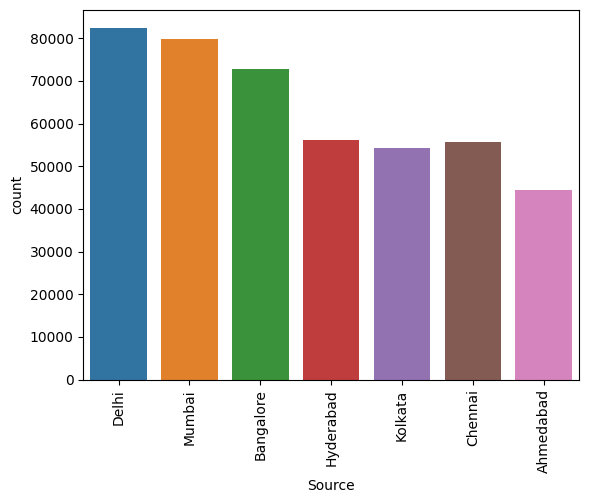

In [21]:
sns.countplot(x="Source", data=df, hue="Source")
plt.xticks(rotation=90)
plt.show()

From each city, people are booking flights in a good amount. But Delhi, Mumbai, Banglore is in the top.  
One more thing is obvious, the income of people living and working in these cities is generally more as compared to other places.

In [22]:
df["Departure"].unique()

array(['After 6 PM', 'Before 6 AM', '12 PM - 6 PM', '6 AM - 12 PM'],
      dtype=object)

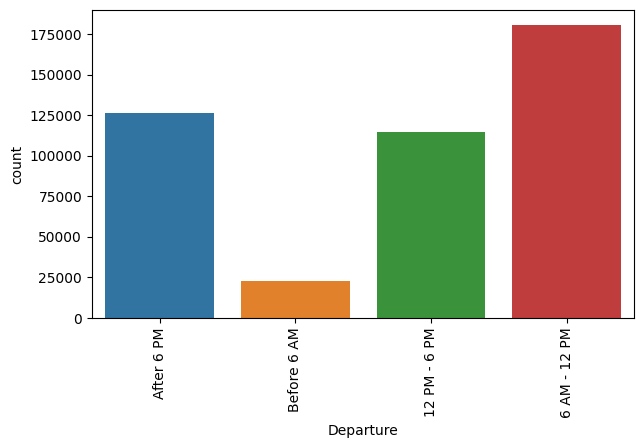

In [23]:
plt.figure(figsize=(7,4), dpi=100)
sns.countplot(x="Departure", data=df, hue="Departure")
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Departure time distribution'}, ylabel='count'>

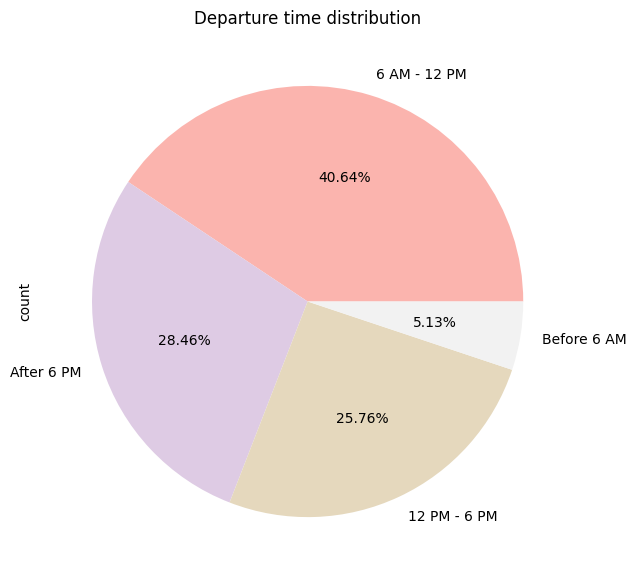

In [24]:
df["Departure"].value_counts().plot.pie(figsize=(7,7), autopct='%1.2f%%', cmap='Pastel1', title="Departure time distribution")

Most of the people are booking after 6am and before 12pm, that is early morning.

In [25]:
df["Total_stops"].unique()

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

<Axes: xlabel='Total_stops', ylabel='count'>

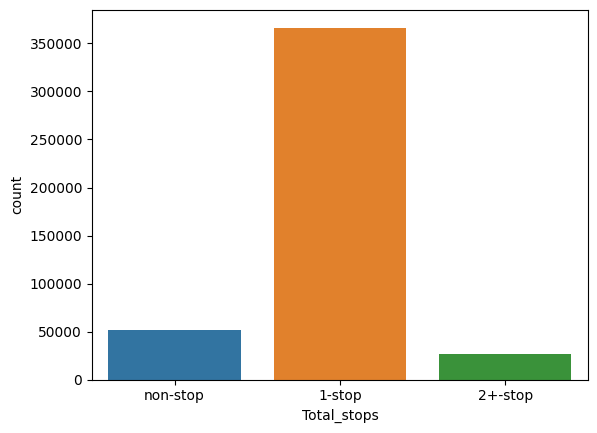

In [26]:
sns.countplot(x="Total_stops", data=df, hue="Total_stops")

In [27]:
df["Total_stops"].value_counts()

Total_stops
1-stop      366527
non-stop     51755
2+-stop      27084
Name: count, dtype: int64

In [28]:
df["Arrival"].unique()

array(['After 6 PM', 'Before 6 AM', '6 AM - 12 PM', '12 PM - 6 PM'],
      dtype=object)

In [29]:
df["Arrival"].value_counts()

Arrival
After 6 PM      196972
6 AM - 12 PM    117665
12 PM - 6 PM    100322
Before 6 AM      30407
Name: count, dtype: int64

<Axes: title={'center': 'Arrival time distribution'}, ylabel='count'>

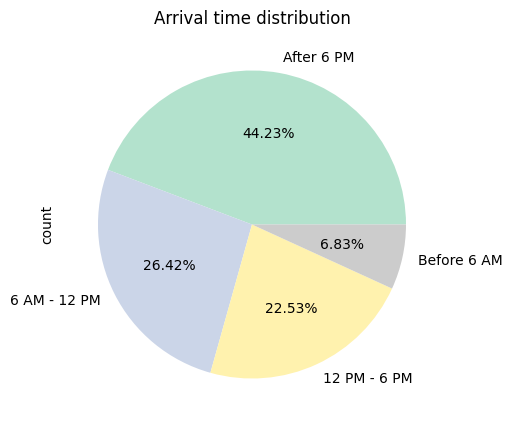

In [30]:
plt.figure(figsize=(5,5))
df["Arrival"].value_counts().plot.pie(autopct='%1.2f%%',cmap="Pastel2", title="Arrival time distribution")


Most of the people are arriving after 6pm.

In [31]:
df["Destination"].value_counts()

Destination
Mumbai       81675
Delhi        76758
Bangalore    71603
Hyderabad    61775
Chennai      57060
Kolkata      53465
Ahmedabad    43030
Name: count, dtype: int64

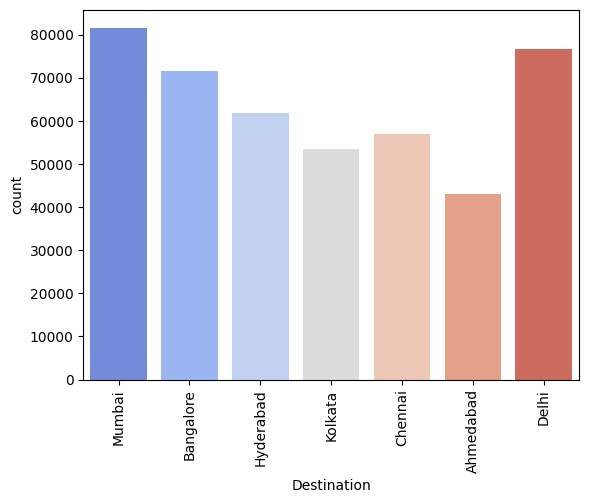

In [32]:
sns.countplot(x="Destination", data=df, hue="Destination", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

Most people were booking from Delhi, Mumbai, and Banglore. And most people's destination is also Delhi, Mumbai, and Bangalore.

In [33]:
# Duration in hours
df["Duration_in_hours"].describe()

count    445366.000000
mean         12.182491
std           7.299361
min           0.750000
25%           6.500000
50%          11.250000
75%          16.333300
max          43.583300
Name: Duration_in_hours, dtype: float64

<Axes: xlabel='Duration_in_hours', ylabel='Count'>

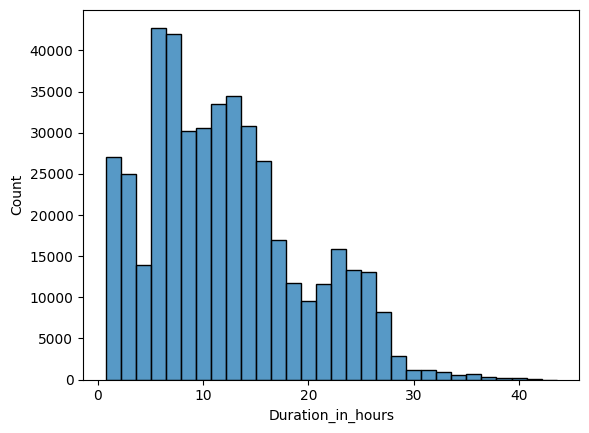

In [34]:
sns.histplot(data=df, x="Duration_in_hours", bins=30)

<Axes: xlabel='Duration_in_hours', ylabel='Density'>

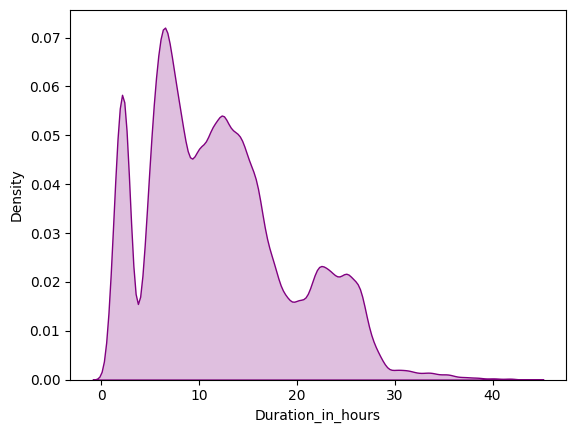

In [35]:
sns.kdeplot(data=df, x="Duration_in_hours", color="purple", fill=True)

Normal distribution is not there, no bell shape. It's obvious that this feature is affected by several factors.

In [36]:
df["Days_left"].sample(10)

265656    23
403789    38
435721    29
128812    50
325712    34
306968    11
80507     36
201597    17
131772    12
247842     1
Name: Days_left, dtype: int64

Seems kinda categorical, but these are still continuous values.

In [37]:
df["Days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

<Axes: xlabel='Days_left', ylabel='Density'>

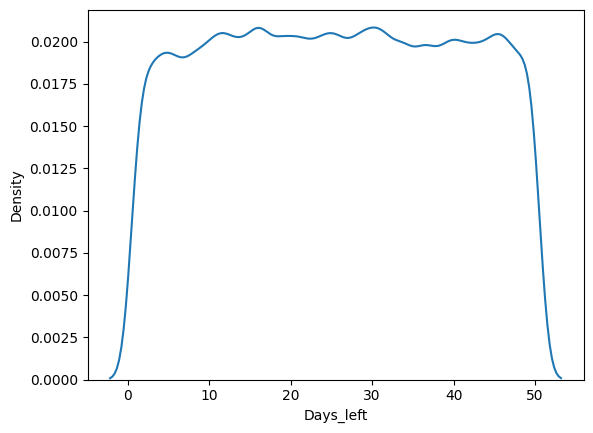

In [38]:
sns.kdeplot(x="Days_left", data=df)

Considering the kde plot, we can say the changes of the number of days_left before departure date, has high probability of lying between 10-45 days. So, most of the tickets are booked between the range of 10 days to slightly more than a month.

In [39]:
df["Fare"].describe()

count    445366.000000
mean      22919.747165
std       20394.214040
min        1307.000000
25%        8712.000000
50%       13362.000000
75%       36980.000000
max      143019.000000
Name: Fare, dtype: float64

<Axes: xlabel='Fare'>

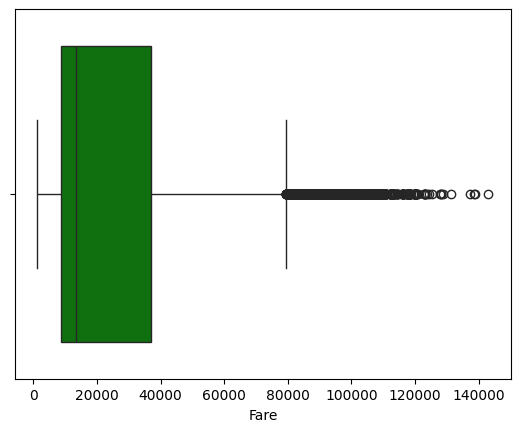

In [40]:
# A box plot for the fare
sns.boxplot(x="Fare", data=df, color="green")

There are so many tickets with more than 80000 price. But not all of these can be outliers. Because price depends on several factors. Later on we'll check if there are any outliers.

<Axes: xlabel='Fare', ylabel='Density'>

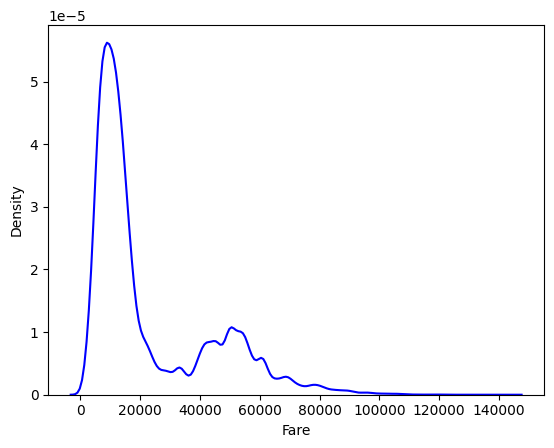

In [41]:
sns.kdeplot(x="Fare", data=df, color="blue")

From the kde plot we are getting better insights.  
Most of the tickets sold are  in the range of 0-2000.  
Less number of tickets are from 40000-60000.  
And very less number of tickets between 100000-120000.

This seems pretty normal. Most of the people are travelling with either economy, or business class. So the ranges with considerable amount of density can be according to those two flight classes, and the ranges we are talking about are 0-2000 and 40000-60000 rupees.

Obviously some points seems to cross the upper bound in the boxplot. But that's okay. Those are not that much.  
**But there can be outliers!**  
**Which points will be the outliers?**
Ans. The answer is simple. There migh some flight fares which are pretty high, but the flight class maybe economy, or of less duration. Such case will be so unusual and can be considered as outliers. 

**Note:**  
Domain knowledge is very important to deal with outliers. But we are generally aware of the flight system, so maybe it won't be that difficult for us to detect some outliers if there are any.

In [42]:
len(df)

445366

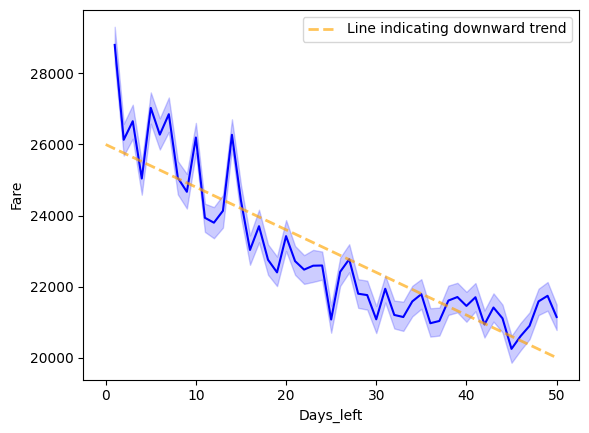

In [43]:
sns.lineplot(x="Days_left", y="Fare", data=df, color="blue")
slope = -120
b_intercept = 26000
x = np.linspace(0, 50, 400000)
y = slope * (x) + b_intercept
plt.plot(x, y, ls='--', alpha=0.65, color='orange', lw=2, label="Line indicating downward trend")
plt.legend()

As the number of days_left goes up, the price comes down. At different points on the x-axis. Downwards trend.

In [44]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


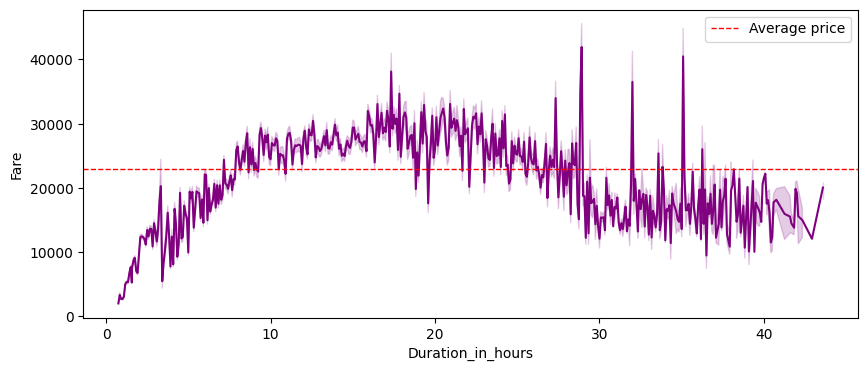

In [45]:
plt.figure(figsize=(10,4))
sns.lineplot(x="Duration_in_hours", y="Fare", data=df, color="purple")
mean_fare = np.mean(df["Fare"])
plt.axhline(y=mean_fare, lw=1, ls='--', color='red', label="Average price")
plt.legend()


The range of Flight Fare is a lot more at different duration(hrs).  
There's a wide range at every point representing duration in hours. And that is because the Fare depends on a lot of other feature columns.

**A few results from this plot:**
* From 0 - 10 hours the Fare seems increasing.
* After 10 till 25, most of the tickets are within the range 20000-30000.
* After 25 hours, we can see a reduce in the Fare price (overally). But still there are so many points, which are high. 
* When the duration is high, and the Fare is high, it seems normal.
* But when duration is hight but the Fare is still not that high, this seems a little off. But maybe the user would have booked the flight earlier, more days might be left.


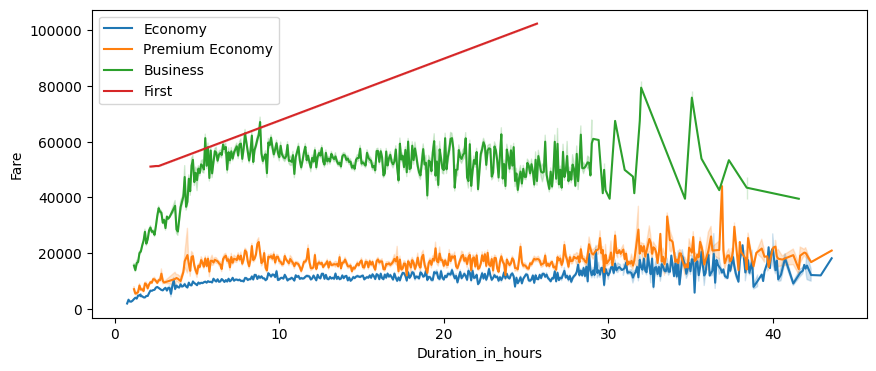

In [46]:
plt.figure(figsize=(10,4))
sns.lineplot(x="Duration_in_hours", y="Fare", data=df, color="purple", hue="Class")
mean_fare = np.mean(df["Fare"])
plt.legend()

We were right! The fare is getting affected heavily by other features that is why the range was so wide at different points.
Here The price of First class is very high, and goes really high when the duration increases.  

* A gradual increase in the price of Economy and Premium Economy can be seen.
* In case of Business class, the Fare increases till approx 8-9 hours of duration. After that there's a gradual decress till 25. And that means this particular subsection depends further on more feature columns.

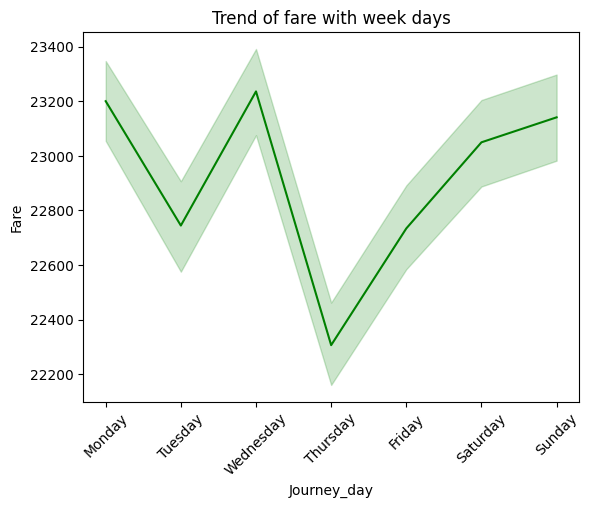

In [47]:
sns.lineplot(x="Journey_day", y="Fare", data=df, color="green")
plt.xticks(rotation=45)
plt.title("Trend of fare with week days")
plt.show()

The price seems to increase towards and on the weekend days.

<Axes: xlabel='Class', ylabel='Fare'>

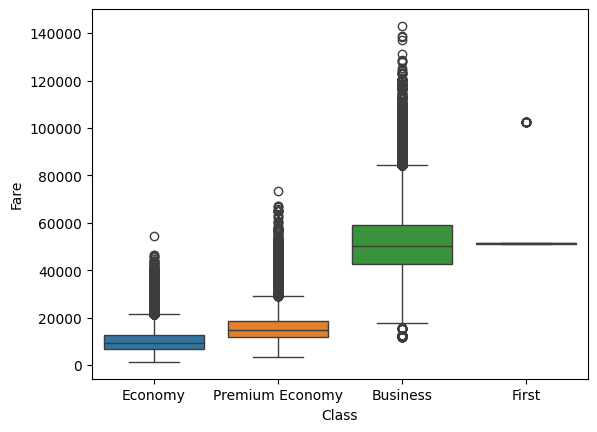

In [48]:
# Fare in relation to the class
sns.boxplot(x="Class", y="Fare", data=df, hue="Class")

According to the class of the Fare, we are not seeing any outliers in the Fare column. It would have been an outlier, if, suppose there was a point on the y axis with a very high price in the Economy (like very high, out of the tolerable standard deviation), then there can be a change that point will be an outlier.

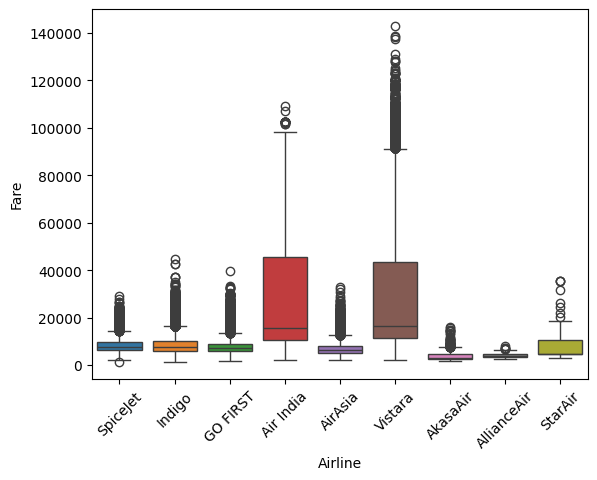

In [49]:
sns.boxplot(x="Airline", y="Fare", data=df, hue="Airline")
plt.xticks(rotation=45)
plt.show()

Vistara and Air Inda are more expensive as compared to other Airline. So Airline is also affecting the fare.

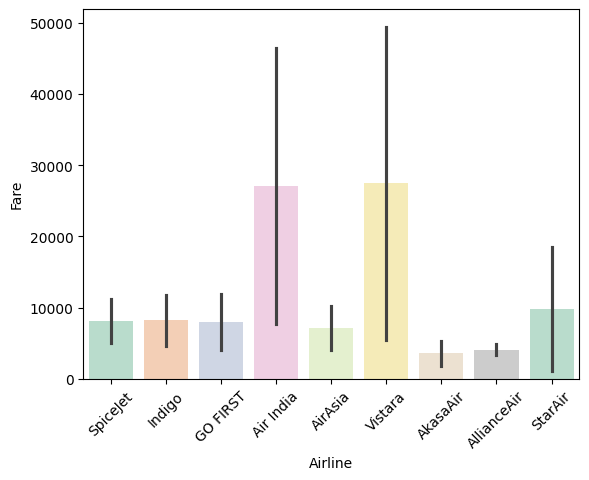

In [50]:
sns.barplot(x="Airline", y="Fare", data=df, hue="Airline", palette="Pastel2", errorbar="sd")
plt.xticks(rotation=45)
plt.show()

Even the standard deviation of the Fare price in case of Air India and Vistara is the largest.  
After that StarAir also has a considerable amount of standard deviation in the Fare price.

In [51]:
# Exploring the data of journey column
df["Date_of_journey"].unique()

array(['2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19',
       '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23',
       '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
       '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31',
       '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
       '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08',
       '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12',
       '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16',
       '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20',
       '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
       '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28',
       '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
       '2023-03-05', '2023-03-06'], dtype=object)

In [52]:
df["Date_of_journey"].nunique()

50

In [53]:
# Dropping this column, date doesn't matter that much, the days left matter more
df = df.drop("Date_of_journey", axis=1)
df.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [54]:
# Data is preprocessed now
# Let's save the data, so that we can do modelling on it
df.to_csv('../data_folder/processed_data.csv', index=False)

In [55]:
# Loading the data which we just saved
loaded_df = pd.read_csv('../data_folder/processed_data.csv')
loaded_df.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


Everything seems okay, let's move to the modeling part.  
The Fare seems to have a linear relation with most of the feature columns, let's try different regression techniques to fit and evaluate some models.

In [56]:
df.columns

Index(['Journey_day', 'Airline', 'Flight_code', 'Class', 'Source', 'Departure',
       'Total_stops', 'Arrival', 'Destination', 'Duration_in_hours',
       'Days_left', 'Fare'],
      dtype='object')